In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
x_train[0].shape #every image of 28x28

(28, 28)

In [5]:
x_train[0]
#28 rows with 28 values each

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

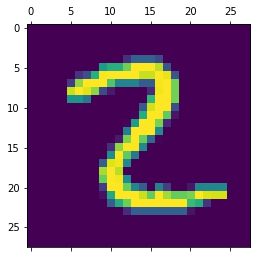

In [6]:
plt.matshow(x_train[76])

In [7]:
y_train[76]

2

In [8]:
#now to flatten the training and testing set
x_train.shape

(60000, 28, 28)

In [9]:
#as we can see above, these are the dimensions of 2d vector. So if we have to convert to 1d,
# shape has to be fed in this format only
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [10]:
#creating a neural network with only input and output layer without any hidden layers
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') #input and output layer is shown along with the activation function
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5) #number of times neural network is run

#Dense, signifies each neural network is connected to others in the network


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 9.9060 - accuracy: 0.8397
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 6.1823 - accuracy: 0.8792
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.6813 - accuracy: 0.8825
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.5998 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4252 - accuracy: 0.8873


In [11]:
#but if we scale the values, we can improve accuracy, i.e if we divide every value by 255, out job becomes easier
x_train=x_train/255
x_test = x_test/255
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') #input and output layer is shown along with the activation function
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4677 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2670 - accuracy: 0.9256


In [12]:
#as we can see, the accuracy has increased
model.evaluate(x_test_flattened,y_test)
#the accuracy seems pretty good

313/313 [==============================] - 1s 1ms/step - loss: 0.2668 - accuracy: 0.9251


[0.2668129801750183, 0.9251000285148621]

In [13]:
#lets predict the values with test sample
y_predicted=model.predict(x_test_flattened)

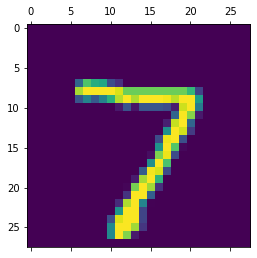

In [14]:
plt.matshow(x_test[0]) 
#we cannot do plt.matshow(x_test_flattened[0]) because it is a 1d arrya and image will notget constructed

In [15]:
y_predicted[0]

array([2.6488036e-02, 2.4533784e-07, 5.8423042e-02, 9.5289099e-01,
       2.7154386e-03, 8.4913403e-02, 1.0509593e-06, 9.9968505e-01,
       7.7716172e-02, 6.2139279e-01], dtype=float32)

In [16]:
import numpy as np
np.max(y_predicted[0])

0.99968505

In [17]:
#as the maximum probability corresponds to the 7th index, number is 7
#but better use
np.argmax(y_predicted[0]) #correctly predicted

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [19]:
cm=tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm
#we cannot use y_predicted in predictions because that would mean that we are comparing 
# probability with actual number results of y_test

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    5,    2,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   5,   11,  920,   18,    7,    3,   13,   10,   40,    5],
       [   4,    0,   20,  915,    1,   26,    2,   10,   23,    9],
       [   1,    1,    4,    1,  915,    0,    9,    3,   10,   38],
       [  10,    3,    4,   29,   11,  777,   11,    6,   33,    8],
       [  11,    3,    6,    1,    8,   15,  909,    2,    3,    0],
       [   1,    5,   24,    8,   10,    0,    0,  935,    2,   43],
       [   7,    8,    6,   20,    9,   24,    8,   10,  872,   10],
       [  11,    6,    1,   10,   26,    6,    0,   11,    7,  931]])>

Text(69.0, 0.5, 'Truth')

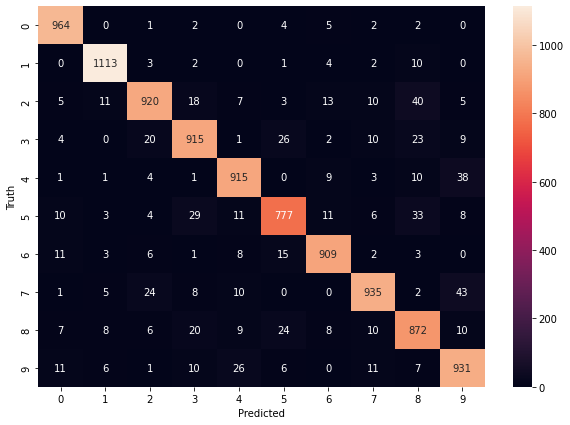

In [20]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
# 961 out of total predictions was correct for 0 and so on

In [22]:

#creating a model with hidden layer

model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), 
    #Since output is written first, the output of input layer goes into the hidden layer. So we specify a random number of hidden layer
    keras.layers.Dense(10,activation='sigmoid') #no need to write input layers, as network already knows
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)
model.evaluate(x_test_flattened,y_test)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2786 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1239 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0852 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0648 - accuracy: 0.9807
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0742 - accuracy: 0.9758


[0.0742124617099762, 0.9757999777793884]

Text(69.0, 0.5, 'Truth')

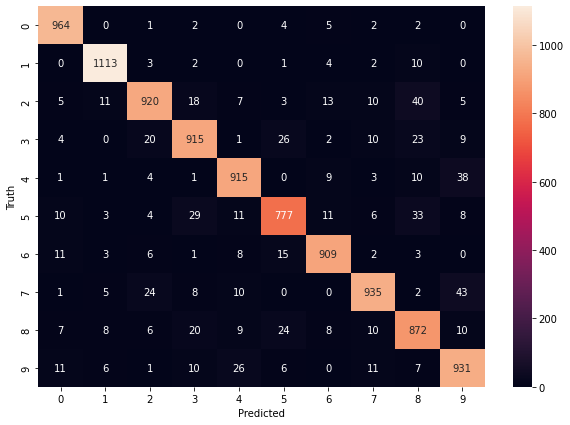

In [23]:

y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
